>#### Mon Jul 15, 2024.
> - Evaluating the PreAmp operation with and without SiPM.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'PreAmps_NoLowPassFilter_data/'

#### Plotting first the PreAmp scope with no SiPM.

In [11]:
### Individually pulse-noise from the preamp??


#Bias connected directed in the SiPM PCB
csv_file_2ch = path+'2chAmp_NoSiPM_NoBias.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_2ch,skiprows=3, header=None)
data.head()


,0,1
0,-2.116000e-07,-0.049292
1,-2.114000e-07,-0.049292
2,-2.112000e-07,-0.049292
3,-2.110000e-07,-0.049292
4,-2.108000e-07,-0.049291


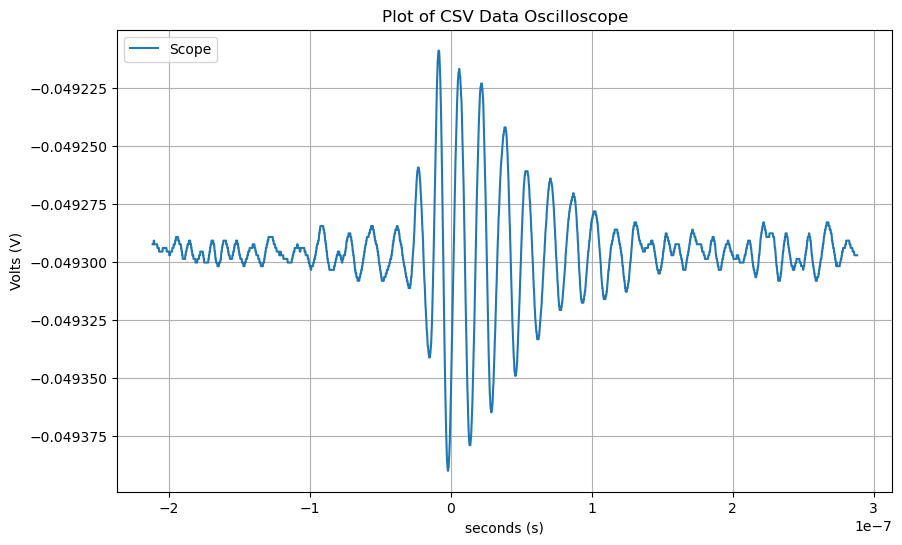

In [30]:

# Extract the columns
x = data.iloc[:, 0]  # the first column is seconds
#y1 = data.iloc[:, 1]  # the second column is Volts (WaveGenerator)
y = data.iloc[:, 1]  # the second column is Volts (SiPM)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='', linestyle='-', label='Scope')
plt.ylabel('Volts (V)')
plt.xlabel(r'seconds (s)')
#plt.yscale('log')
plt.title('Plot of CSV Data Oscilloscope')
plt.grid()
plt.legend(loc='upper left', ncols=1 )
plt.show()

[1.23239203e+02 3.06712167e-04 2.55984922e-04 ... 4.35709778e-04
 2.55984922e-04 3.06712167e-04]


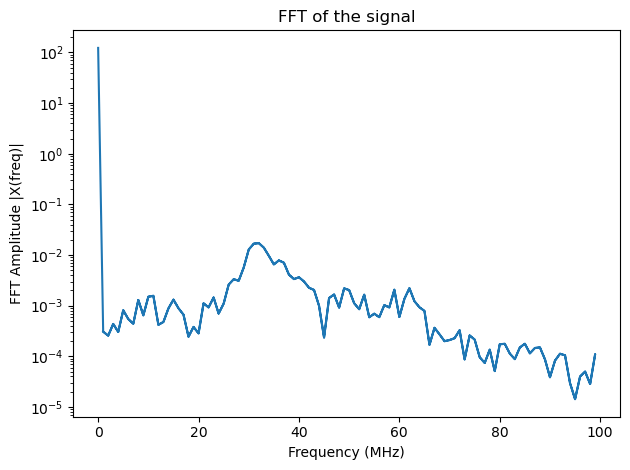

In [33]:
from scipy.fftpack import fft, ifft, fftfreq

y = np.array(y)
X = fft(y)

print(np.abs(X))
T = 1.0 / len(x)

N = len(X)

freq = fftfreq(N, T)



plt.figure()
plt.plot(np.abs(freq[np.abs(freq) <100]), np.abs(X)[np.abs(freq) <100])
plt.ylabel('FFT Amplitude |X(freq)|')
plt.yscale('log')
plt.title('FFT of the signal')
plt.xlabel('Frequency (MHz)')

plt.tight_layout()
plt.show()